In [1]:
import braidz_analysis as bz
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import seaborn as sns

base_folder = "/gpfs/soma_fs/nfc/nfc3008/Experiments/"
cm2inch = 1 / 2.54

2025-01-21 11:02:20,180 [INFO] 
Limited Linear Model Support Detected! 
---> PYCHEBFUN is not installed. 
---> Install pychebfun to use chebfun derivatives (https://github.com/pychebfun/pychebfun/) 
You can still use other methods 



In [2]:
dnax_raw_data = bz.braidz.read_braidz("20230203_145747.braidz", base_folder)

In [4]:
dnax_opto_data = bz.processing.get_stim_or_opto_data(dnax_raw_data["df"], dnax_raw_data["stim"], type="opto")

  0%|          | 0/1311 [00:00<?, ?it/s]

100%|██████████| 1311/1311 [03:10<00:00,  6.89it/s]


In [20]:
dnax_opto_data_filtered = bz.filtering.filter_data_dict(
    dnax_opto_data,
    (dnax_opto_data["frames_in_radius"] >= 15) & (dnax_opto_data["sham"] == 0)
)

# dnax_opto_data_filtered_sham = bz.filtering.filter_data_dict(
#     dnax_opto_data,
#     (dnax_opto_data["sham"] == 1)
# )

dnax_opto_data_filtered_sham = bz.filtering.filter_data_dict(
    dnax_opto_data,
    (dnax_opto_data["frames_in_radius"] < 15)
)

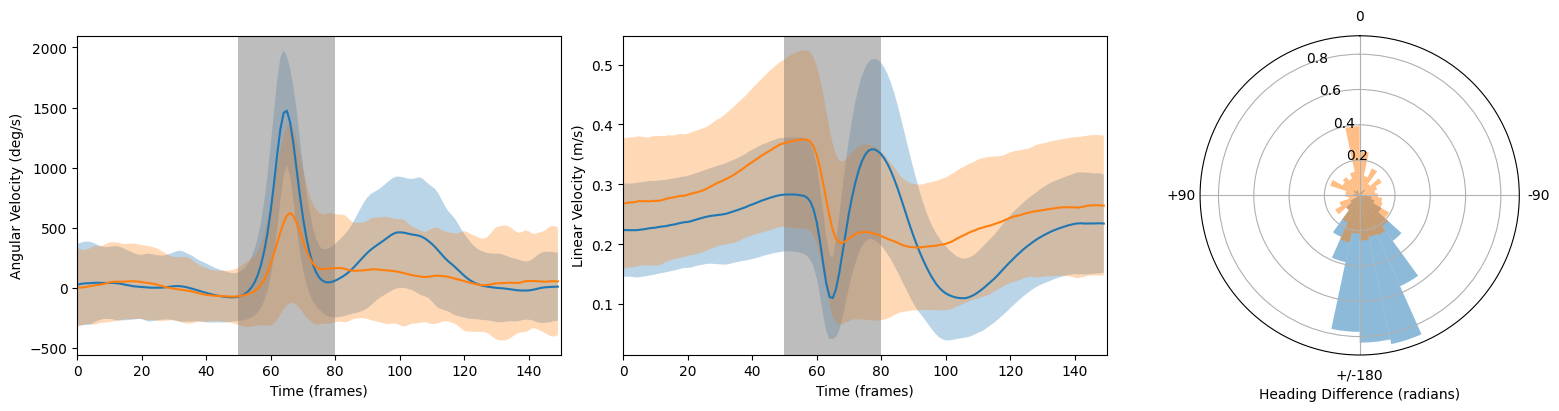

In [26]:
fig = plt.figure(figsize=(16, 4), constrained_layout=True)
ax1 = fig.add_subplot(1, 3, 1)
bz.plotting.plot_angular_velocity(
    dnax_opto_data_filtered,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True
)

bz.plotting.plot_angular_velocity(
    dnax_opto_data_filtered_sham,
    ax = ax1,
    use_abs=True,
    baseline_range=[0, 50],
    shaded_region=[50, 80],
    convert_to_degrees=True,
)

ax2 = fig.add_subplot(1, 3, 2)
bz.plotting.plot_linear_velocity(
    dnax_opto_data_filtered,
    ax = ax2,
)

bz.plotting.plot_linear_velocity(
    dnax_opto_data_filtered_sham,
    ax = ax2,

)

ax3 = fig.add_subplot(1, 3, 3, projection='polar')
bz.plotting.plot_heading_difference(dnax_opto_data_filtered, ax=ax3, convert_to_degrees=False, density=True, alpha=0.5)
bz.plotting.plot_heading_difference(dnax_opto_data_filtered_sham, ax=ax3, convert_to_degrees=False, density=True, alpha=0.5)

# Set 0 so it's pointing "North"
ax3.set_theta_zero_location("N")
ax3.set_xticks([0, np.pi/2, np.pi, 3*np.pi/2])
ax3.set_xticklabels(["0", "+90", "+/-180", "-90"])
ax3.set_ylabel("")
plt.show()